# K-Means con Scikit-learn

Ejemplo introductorio.


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

## Algoritmo K-Means

('Reduced dataset shape:', (150, 2))
Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


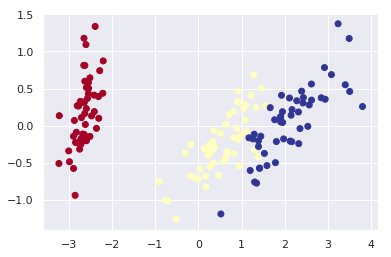

In [ ]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
# print(iris)

X, y = iris.data, iris.target
from sklearn.decomposition import PCA #analisis de componentes principales

pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

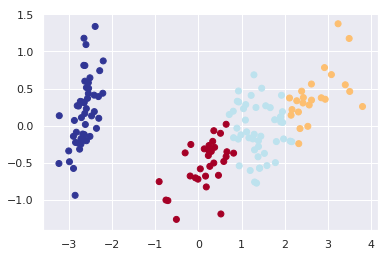

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4, random_state=5, init='random') # Seteo de parametros y asignacion de numero aleatorio semilla para centros iniciales
k_means.fit(X) #minimiza promedio de distancias de datos a los K centros (means) mas cercanos
y_pred = k_means.predict(X) #Ojo se aplica a data original

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); #En este caso, la data que originalmente es 4D se representa en 2D por motivo de visualizacion.

K-Means es un algoritmo para el agrupamiento de datos: es decir, la búsqueda de grupos de datos basándose únicamente en los atributos de los datos (no en las etiquetas).

K-Means es un algoritmo relativamente fácil de entender. Primero, busca los centros de clúster que son la media de los puntos dentro de ellos, de modo que cada punto esté más cerca del centro del clúster al que está asignado.

Veamos cómo opera K-Means en los clústers simples vistos anteriormente. Para enfatizar que esto no está supervisado, no trazaremos los colores de los grupos:

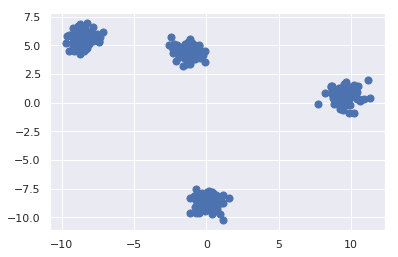

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=7, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

A simple vista, es fácil distinguir los cuatro grupos. Sin embargo, si se tuviera que realizar una búsqueda exhaustiva de todos los posibles grupos de datos, el espacio de búsqueda sería exponencial en el número de puntos. Afortunadamente, existe un procedimiento bastante estudiado llamado **Expectation-Maximization (EM)** que scikit-learn implementa y que se refiere a los pasos de 1)asignacion de centros y 2)calculo de los centros mismos, de modo que K-Means se puede resolver de manera relativamente rápida.

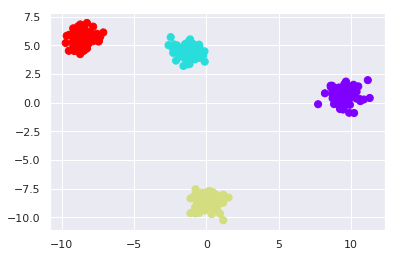

In [ ]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

¡El algoritmo identifica los cuatro grupos de puntos como lo haríamos a simple vista!

## Algoritmo K-Means: Vista de Expectation Maximization

K-Means es un ejemplo de algoritmo que utiliza un enfoque de **EM** para llegar a la solución (como en caso de GMM).
**EM** es un enfoque de dos pasos que funciona de la siguiente manera:

1. Adivina algunos centros de cluster
2. Repetir hasta converger.

A. Asignar puntos al centro del clúster más cercano

B. Establecer los centros del clúster a la media
   




Este algoritmo (a menudo) convergerá a los centros óptimos de clústers.

### Advertencias sobre K-Means

* La convergencia global de este algoritmo no está garantizada; por ese motivo, por defecto, scikit-learn utiliza un gran número de inicializaciones aleatorias y encuentra los mejores resultados.

* El número de agrupaciones debe establecerse de antemano. Hay otros algoritmos de agrupación en clúster para los que se puede eliminar este requisito.